## Install packages

In [ ]:
### install my package
### pip install git+git://github.com/chvlyl/kernel_kmeans_and_adaptive_clustering.git
### re-install the package if it is updated
### pip install --upgrade git+git://github.com/chvlyl/kernel_kmeans_and_adaptive_clustering.git

In [3]:
import sys
import pandas as pd
import numpy as np
from kmean_clustering import kmean_clustering as kc

In [5]:
print('Python')
print(sys.version)
print('Numpy')
print(np.__version__)
print('Pandas')
print(pd.__version__)

Python
3.6.0 | packaged by conda-forge | (default, Jan 14 2017, 03:13:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.54)]
Numpy
1.13.3
Pandas
0.21.0


## Load data

In [77]:
m1, cov1 = [9, 8], [[1.5, 2], [1, 2]]
m2, cov2 = [5, 13], [[2.5, -1.5], [-1.5, 1.5]]
m3, cov3 = [3, 7], [[0.25, 0.5], [-0.1, 0.5]]
data1 = np.random.multivariate_normal(m1, cov1, 250)
data2 = np.random.multivariate_normal(m2, cov2, 180)
data3 = np.random.multivariate_normal(m3, cov3, 100)
X = np.vstack((data1,np.vstack((data2,data3))))
np.random.shuffle(X)

/Users/chvlyl/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:4: RuntimeWarning: covariance is not positive-semidefinite.
/Users/chvlyl/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:6: RuntimeWarning: covariance is not positive-semidefinite.


In [96]:
X.shape

(530, 2)

In [100]:
from  scipy.spatial.distance import pdist,squareform
### squared Euclidean distance
def gaussian_kernel(data,sigma=1.0)
    return np.exp(-0.5/(sigma**2)*squareform(pdist(X,'sqeuclidean')))

(530, 530)

In [86]:
def polynomial_kernel(data,p=2,gamma=1.0):
    return (np.dot(data,data.T)+gamma)**p

In [90]:
data_poly = polynomial_kernel(data=X,p=2,gamma=1.0)

In [ ]:
def k_means_kernel(data, n_clusters=3, n_init=10, max_iter=100, verbose=False):
    '''
    data: a numeric numpy array
    n_clusters: number of clusters
    n_init: number of different initializations to run kmeans
    max_iter: number of max iterations 
    verbose: output detailed information
    '''
    ### may not be efficient in terms of memory use
    ### no need to save whole history
    ### get whole hitory for debugging purpose
    controid_history = {}
    cluster_label_history = {}
    sse_history = np.zeros(shape=(n_init,1))
    ### start k-means
    n_points = data.shape[0]
    ### calculate the kernel matrix
    kernel_matrix = polynomial_kernel(data,p=2)
    ### repeat k-means n_init times 
    ### return the best one 
    for i_init in range(n_init):
        if verbose: print('Random seed',i_init)
        #### set random seed
        np.random.seed(i_init)
        #### generate initial cluster labels
        cluster_labels = np.random.choice(range(n_clusters),size=n_points, replace=True)
        #### generate initial centroids
        #### randomly choose n_clusters points from the data as centroids
        centroids = data[np.random.choice(np.arange(n_points), n_clusters, replace=False),:]
        for i_iter in range(max_iter):
            if verbose: print('Iteration',i_iter,end=', ')
            distance_to_centroids = np.zeros(shape=(data.shape[0],n_clusters))
            for i_centroid in range(n_clusters):
                ### ord=2 is L2 distance
                ### axis=1 is to calculate norm along columns
                distance_to_centroids[:,i_centroid] = np.linalg.norm(data-centroids[i_centroid,:],ord=2,axis=1)
                #break
            ### assign the cluster labels
            cluster_labels = np.argmin(distance_to_centroids,axis=1)
            sse = np.sum((np.min(distance_to_centroids,axis=1))**2)
            print('SSE',sse)
            ### re-calculate centroids
            previous_centroids = centroids
            centroids = np.array([data[cluster_labels == i_centroid].mean(axis = 0) for i_centroid in range(n_clusters)])
            ### if centroids don't change
            ### stop the iteration
            if np.all(previous_centroids == centroids):
                if verbose: print('Centroids do not change',i_iter)
                break
        controid_history[i_init] = centroids
        cluster_label_history[i_init] = cluster_labels
        sse_history[i_init] = sse
    ### find the best initializations
    best_iter = np.argmin(sse_history)
    best_sse = sse_history[best_iter]
    best_controids = controid_history[best_iter]
    best_cluster_label = cluster_label_history[best_iter]
    
    return {'best_iter':best_iter,
            'best_sse':best_sse,
            'best_controids':best_controids,
            'best_cluster_label':best_cluster_label,
            'controid_history':controid_history,
            'cluster_label_history':cluster_label_history,
            'sse_history':sse_history,
           }

In [70]:
-



result = k_means(X,verbose=True)

Random seed 0
Iteration 0, SSE 5474.88155299
Iteration 1, SSE 3988.32562661
Iteration 2, SSE 3785.94616109
Iteration 3, SSE 2854.11452927
Iteration 4, SSE 1898.05258766
Iteration 5, SSE 1609.53668852
Iteration 6, SSE 1609.10070392
Centroids do not change 6
Random seed 1
Iteration 0, SSE 2572.54392824
Iteration 1, SSE 1614.06678931
Iteration 2, SSE 1609.10070392
Centroids do not change 2
Random seed 2
Iteration 0, SSE 2383.38306252
Iteration 1, SSE 1664.78034817
Iteration 2, SSE 1609.91447181
Iteration 3, SSE 1609.10070392
Centroids do not change 3
Random seed 3
Iteration 0, SSE 7540.57730047
Iteration 1, SSE 2684.655758
Iteration 2, SSE 1754.07797514
Iteration 3, SSE 1609.53668852
Iteration 4, SSE 1609.10070392
Centroids do not change 4
Random seed 4
Iteration 0, SSE 3022.99554883
Iteration 1, SSE 1641.72664302
Iteration 2, SSE 1609.29398442
Iteration 3, SSE 1609.10070392
Centroids do not change 3
Random seed 5
Iteration 0, SSE 8131.26158301
Iteration 1, SSE 3855.43332334
Iteration 2, 

/Users/chvlyl/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:67: RuntimeWarning: covariance is not positive-semidefinite.
/Users/chvlyl/anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py:69: RuntimeWarning: covariance is not positive-semidefinite.


In [62]:
result['best_controids']

array([[  4.72689909,  13.16637109],
       [  3.09968712,   6.94069905],
       [  9.12161796,   8.36151207]])

In [27]:
np.random.seed(0)
print(np.random.choice(range(10)))
print(np.random.choice(range(10)))
print(np.random.randint(1))

5
8
0


In [48]:
data = X
n_clusters=3
n_points = data.shape[0]
np.random.seed(0)
np.random.choice(range(n_clusters),size=n_points, replace=True)
centroids = data[np.random.choice(np.arange(n_points), n_clusters, replace=False),:]
np.linalg.norm(data-centroids[0,:],ord=2,axis=1)

array([ 5.6029233 ,  0.32119263,  1.13404998,  5.16438903,  7.21216527,
        1.22578648,  0.42946695,  5.94600953,  5.70124952,  5.95821365,
        0.94381049,  2.66774067,  5.84773727,  6.63848292,  5.49592836,
        1.63176393,  5.95064989,  6.21797339,  6.53555404,  5.01832455,
        1.57653408,  6.72105217,  6.07926353,  6.01652472,  1.61853274,
        0.57749984,  2.94222419,  4.39916373,  5.21522487,  1.82281095,
        6.96540749,  3.25610668,  6.41721018,  5.7860659 ,  6.42567835,
        0.85599829,  5.55846831,  1.20033079,  1.02795357,  0.63314866,
        5.34818087,  6.53719348,  7.32125567,  5.73259349,  2.19397904,
        6.51459805,  5.34572374,  8.13074284,  7.30889715,  5.08113312,
        2.40181163,  5.98653025,  0.9726583 ,  2.10809481,  1.30366299,
        6.95517876,  6.11642349,  5.71941125,  5.19656651,  6.08906678,
        6.09450193,  5.84899431,  6.17309507,  7.28350057,  7.14751189,
        5.61888527,  5.02618662,  5.79481826,  6.29442871,  6.17

In [44]:
np.sqrt(np.dot(data[0,:]-centroids[0,:],data[0,:]-centroids[0,:]))

1.1574581743179011

In [64]:
from sklearn.cluster import KMeans
import numpy as np
X = np.array([[1, 2], [1, 4], [1, 0],
               [4, 2], [4, 4], [4, 0]])
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_


array([0, 0, 0, 1, 1, 1], dtype=int32)

In [65]:
kmeans.predict([[0, 0], [4, 4]])

kmeans.cluster_centers_


array([[ 1.,  2.],
       [ 4.,  2.]])

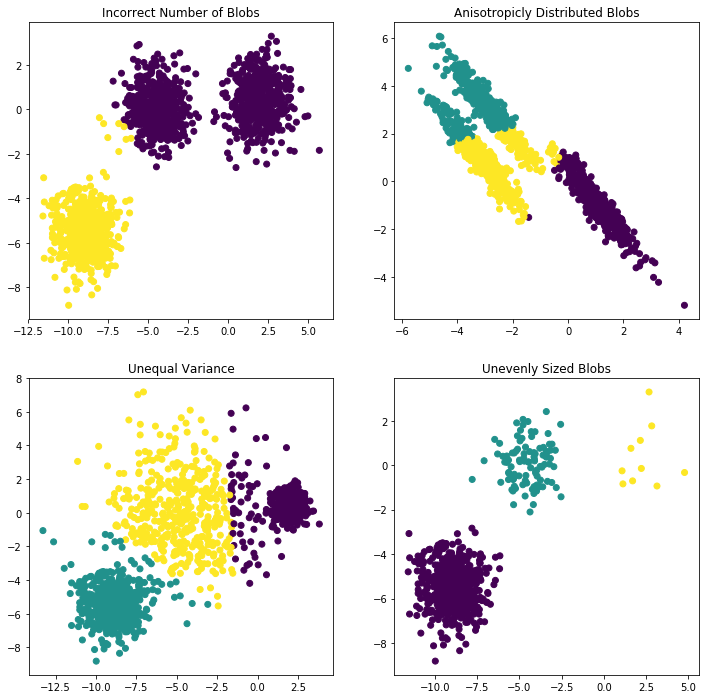

In [72]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(222)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(223)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_pred = KMeans(n_clusters=3,
                random_state=random_state).fit_predict(X_filtered)

plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

Random seed 0
Iteration 0, SSE 749.848215437
Iteration 1, SSE 543.727884201
Centroids do not change 1
Random seed 1
Iteration 0, SSE 3677.82800964
Iteration 1, SSE 2072.54500519
Iteration 2, SSE 704.389712566
Iteration 3, SSE 543.727884201
Centroids do not change 3
Random seed 2
Iteration 0, SSE 3868.71366749
Iteration 1, SSE 1461.6058755
Iteration 2, SSE 545.704682933
Iteration 3, SSE 543.727884201
Centroids do not change 3
Random seed 3
Iteration 0, SSE 4120.87436735
Iteration 1, SSE 1201.25359506
Iteration 2, SSE 544.816372144
Iteration 3, SSE 543.727884201
Centroids do not change 3
Random seed 4
Iteration 0, SSE 3091.028048
Iteration 1, SSE 1291.72838321
Iteration 2, SSE 549.508188292
Iteration 3, SSE 543.727884201
Centroids do not change 3
Random seed 5
Iteration 0, SSE 8593.95716308
Iteration 1, SSE 3463.26381384
Iteration 2, SSE 1066.14753274
Iteration 3, SSE 544.026008482
Iteration 4, SSE 543.727884201
Centroids do not change 4
Random seed 6
Iteration 0, SSE 897.702457108
Itera

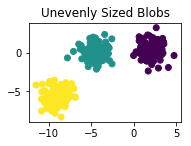

In [73]:
# Unevenly sized blobs
X_filtered = np.vstack((X[y == 0][:100], X[y == 1][:100], X[y == 2][:100]))
#y_pred = KMeans(n_clusters=3,
#                random_state=random_state).fit_predict(X_filtered)
result = k_means(X_filtered,n_clusters=3,verbose=True)
y_pred = result['best_cluster_label']
plt.subplot(224)
plt.scatter(X_filtered[:, 0], X_filtered[:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

plt.show()

In [74]:
result['best_iter']

0